<a href="https://colab.research.google.com/github/jocelynbaduria/Assignment-4_part_1_2/blob/main/Jocelyn_Baduria_Assignment_4_part_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1. MNIST Classifier**
- Use plain feed forward NNs without keras NN library but just numpy.
- Can use keras only for image augmentation and for getting training set.
- Dont use keras for training model /testing other than data preprocessing - like image data augmentation, scaling, and normalization.

**A. Mini Batch Gradient Descent along with appropriate learning rate. **

**B. The code should do dropout **

**C. The code should do basic image augmentations to supplement the training data (not testing data) using keras libraries (NEW than the deck) **

**D. The code should use  3 or more layers for training (not 2 as in example ) ** 

**E. The code will continue to use relu activation layer in right places like python code **

**F. The code should normalize the input as discussed in the class before training (scaling the input) **

**G.The code should use appropriate learning rate (try out few to find out which one works) **

**H. The code should provide appropriate metrics, visualization,  testing and training accuracy etc.,. and plot the results and confusion matrix  (this is important) **

I. The code should display top common errors like in below link (References Link).
Extra points if you hit 99% test accuracy with these changes (very challenging given you are not using CNNs).


## **Mount the Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Libraries**

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Use keras for loading training set only
from keras.datasets import mnist
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import itertools

from keras.preprocessing.image import ImageDataGenerator

# **Neural Nets MNIST 3 layer Model with Normalization prior Training**

Training MNIST -  Error and Accuracy Without Mini-Batch and dropout with Learning rate(0.005), Iterations ( 350 )


I:349 Train-Error:0.108 Train-Accuracy:1.0

Test-Error:0.653, Test-Accuracy:0.7073


## **Load the MNIST digit dataset using (1000,28x28)/255 shape size**

In [75]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

digits, labels = (X_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

## **Do One Hot Encoding of Labels**

In [76]:
encode_labels = np.zeros((len(labels),10))

## For Loop enumerating the encoded labels
for i,l in enumerate(labels):
    encode_labels[i][l] = 1
labels = encode_labels

## **Reshape the digits image in 3Dimension H=28px, W=28px, canal = 1**

In [77]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

# Reshape the test dataset to a one channel
test_digits = X_test.reshape(len(X_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

## **Plot the digit images as gray scales**

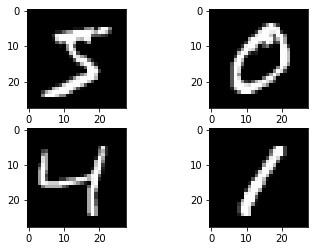

In [78]:
plt.subplot(221)
plt.imshow(X_train[0][:,:,0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1][:,:,0], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2][:,:,0], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3][:,:,0], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## **Plot the first digit images as gray scales**

In [79]:
df = pd.DataFrame(X_train[1][:,:,0])
df.style.set_properties(**{'font-size':'2pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0


## **Perform Grayscale Normalization of the data prior training **

F. The code should normalize the input as discussed in the class before training (scaling the input)

In [80]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### **Create Activation Function**

In [81]:
# seed random numbers to make calculation
np.random.seed(1)

# returns x if x > 0, return 0 otherwise
Relu = lambda x:(x>=0) * x 

# returns 1 for input > 0, return 0 otherwise
Relu_derivative = lambda x: x>=0 

## **Initialize learning rate (0.005), epoch(350), hidden layers(40), pixels per image(784), number of target values/labels(10)**


Old setting- Initialize learning rate (0.005), iterations(350), hidden layers(40), pixels per image(784), number of target values/labels(10)
lr, epoch, hidden_size, pixels_per_image, num_labels = (0.005, 350, 40, 784, 10)

In [82]:
lr, epoch, hidden_size, pixels, numLabels = (0.005, 350, 40, 784, 10)

## **Randomly Initialize the weights with mean 0, w = np.random.rand(n) * sqrt(2.0/n)**

In [83]:
weights0_1 = 0.2*np.random.random((pixels,hidden_size)) - 0.1
weights1_2 = 0.2*np.random.random((hidden_size,numLabels)) - 0.1

## **Forward propagation and Backward Propagation, Cost function computation using MSE.**

In [84]:
for j in range(epoch):
    error, correctCnt = (0.0, 0)

    # Feed forward through layers 0, 1, and 2 ( 3 layers)
    for i in range(len(digits)):
        layer_0 = digits[i:i+1]
        layer_1 = Relu(np.dot(layer_0,weights0_1))
        layer_2 = np.dot(layer_1,weights1_2)

    # How much did we miss the target value(error)?
        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correctCnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))

    # Compute the gradient descent using relu activation function
        layer_2_deltaChange = (labels[i:i+1] - layer_2)
        layer_1_deltaChange = layer_2_deltaChange.dot(weights1_2.T) * Relu_derivative(layer_1)

    # Updating the weights 
        weights1_2 += lr * layer_1.T.dot(layer_2_deltaChange)
        weights0_1 += lr * layer_0.T.dot(layer_1_deltaChange)

# Print the error for each training epoch
    print("\r Epoch:" + str(j) + " Training-Error:" + str(error/float(len(digits)))[0:5] + ", Training-Accuracy:" + str(correctCnt/float(len(digits))))

 Epoch:0 Training-Error:0.722, Training-Accuracy:0.537
 Epoch:1 Training-Error:0.512, Training-Accuracy:0.753
 Epoch:2 Training-Error:0.448, Training-Accuracy:0.804
 Epoch:3 Training-Error:0.411, Training-Accuracy:0.837
 Epoch:4 Training-Error:0.385, Training-Accuracy:0.846
 Epoch:5 Training-Error:0.367, Training-Accuracy:0.863
 Epoch:6 Training-Error:0.352, Training-Accuracy:0.876
 Epoch:7 Training-Error:0.340, Training-Accuracy:0.884
 Epoch:8 Training-Error:0.329, Training-Accuracy:0.892
 Epoch:9 Training-Error:0.320, Training-Accuracy:0.897
 Epoch:10 Training-Error:0.312, Training-Accuracy:0.901
 Epoch:11 Training-Error:0.304, Training-Accuracy:0.904
 Epoch:12 Training-Error:0.297, Training-Accuracy:0.91
 Epoch:13 Training-Error:0.291, Training-Accuracy:0.914
 Epoch:14 Training-Error:0.286, Training-Accuracy:0.918
 Epoch:15 Training-Error:0.281, Training-Accuracy:0.918
 Epoch:16 Training-Error:0.276, Training-Accuracy:0.921
 Epoch:17 Training-Error:0.272, Training-Accuracy:0.922
 Ep

## **Test the MNIST digits - Using Forward Propagation, Cost Function (Error Computation) and Accuracy without Mini Batch and Dropout**

In [85]:
# Test Digits Sample
if(j % 10 == 0 or j == epoch-1):
    error, correctCnt = (0.0, 0)

    for i in range(len(test_digits)):
        # Feed forward through layers 0, 1, and 2 ( 3 layers) for test MNIST digit samples
        layer_0 = test_digits[i:i+1]
        layer_1 = Relu(np.dot(layer_0,weights0_1))
        layer_2 = np.dot(layer_1,weights1_2)

        # how much did we miss the target value(error)?
        error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
        correctCnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
      
    # Print the errot for each iterations for test set
    # print("\r Epoch:" + str(j) + " Test-Error:" + str(error/float(len(test_digits)))[0:5] + ", Test-Accuracy:" + str(correctCnt/float(len(test_digits))))
    print(" Test-Error:" + str(error/float(len(test_digits)))[0:5] + ", Test-Accuracy:" + str(correctCnt/float(len(test_digits))))

 Test-Error:0.653, Test-Accuracy:0.7073


# **Adding Dropout **

B. The code should do dropout

The test accuracy improved from 0.7073 ~ 0.8065

Epoch:299 Training-Error:0.342-> Training-Accuracy:0.883, Test-Error:0.413 -> Test-Accuracy:0.8065

## **Load the MNIST digit dataset using (1000,28x28)/255 shape size**

In [86]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

digits, labels = (X_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

## **Do One Hot Encoding of Labels**

In [87]:
encode_labels = np.zeros((len(labels),10))

## For Loop enumerating the encoded labels
for i,l in enumerate(labels):
    encode_labels[i][l] = 1
labels = encode_labels

## **Reshape the digits image in 3Dimension H=28px, W=28px, canal = 1**

In [88]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

# Reshape the test dataset to a one channel
test_digits = X_test.reshape(len(X_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

## **Perform Grayscale Normalization of the data prior training **

F. The code should normalize the input as discussed in the class before training (scaling the input)

lr, epoch, hidden_size, = (0.005, 300, 100)
pixels, numLabels = (784, 10)

In [89]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## **Neural Network MNIST Model with Dropout**

In [90]:
import numpy, sys
np.random.seed(1)

#Activation Function

def Relu(x):
    # returns x if x > 0
    return ( x >= 0 ) * x

def Relu_derivative(output):
    # returns 1 for input > 0
    return output >= 0 

# Initialize parameters
lr, epoch, hidden_size, = (0.005, 300, 100)
pixels, numLabels = (784, 10)

weights0_1 = 0.2*np.random.random((pixels, hidden_size)) - 0.1
weights1_2 = 0.2*np.random.random((hidden_size, numLabels)) - 0.1

for j in range(epoch):
    error, correctCnt = (0.0, 0)

    # Feed forward through layers 0, 1, and 2 ( 3 layers)
    for i in range(len(digits)):
        layer_0 = digits[i:i+1]
        layer_1 = Relu(np.dot(layer_0,weights0_1))

        # Adding Dropout
        dropOut_mask = np.random.randint(2, size=layer_1.shape)

        layer_1 *= dropOut_mask * 2
        layer_2 = np.dot(layer_1, weights1_2)  

    # How much did we miss the target value(error)?
        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correctCnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))

    # Compute the gradient descent using relu activation function
        layer_2_deltaChange = (labels[i:i+1] - layer_2)
        layer_1_deltaChange = layer_2_deltaChange.dot(weights1_2.T) * Relu_derivative(layer_1)

    # Adding DropOut
        layer_1_deltaChange *+ dropOut_mask

    # Updating the weights 
        weights1_2 += lr * layer_1.T.dot(layer_2_deltaChange)
        weights0_1 += lr * layer_0.T.dot(layer_1_deltaChange)

    # Test Digits Sample
    if(j % 10 == 0 or j == epoch-1):
        testError, testCorrectcnt = (0.0, 0)

    for i in range(len(test_digits)):
        # Feed forward through layers 0, 1, and 2 ( 3 layers) for test MNIST digit samples
        layer_0 = test_digits[i:i+1]
        layer_1 = Relu(np.dot(layer_0,weights0_1))
        layer_2 = np.dot(layer_1,weights1_2)

        # how much did we miss the target value(error)?
        testError += np.sum((test_labels[i:i+1] - layer_2) ** 2)
        testCorrectcnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
      

    print("\r Epoch:" + str(j) + " Training-Error:" + str(error/float(len(digits)))[0:5] + "-> Training-Accuracy:" + str(correctCnt/float(len(digits))) + \
          ", Test-Error:" + str(testError/float(len(test_digits)))[0:5] + " -> Test-Accuracy:" + str(testCorrectcnt/float(len(test_digits))))
    # print("\r Epoch:" + str(j) + " Training-Error:" + str(error/float(len(digits)))[0:5] + ", Training-Accuracy:" + str(correctCnt/float(len(digits))))

 Epoch:0 Training-Error:0.889-> Training-Accuracy:0.474, Test-Error:0.584 -> Test-Accuracy:0.6681
 Epoch:1 Training-Error:0.624-> Training-Accuracy:0.666, Test-Error:1.101 -> Test-Accuracy:1.3949
 Epoch:2 Training-Error:0.567-> Training-Accuracy:0.719, Test-Error:1.591 -> Test-Accuracy:2.1459
 Epoch:3 Training-Error:0.527-> Training-Accuracy:0.741, Test-Error:2.053 -> Test-Accuracy:2.919
 Epoch:4 Training-Error:0.502-> Training-Accuracy:0.758, Test-Error:2.496 -> Test-Accuracy:3.7001
 Epoch:5 Training-Error:0.485-> Training-Accuracy:0.77, Test-Error:2.919 -> Test-Accuracy:4.5049
 Epoch:6 Training-Error:0.481-> Training-Accuracy:0.77, Test-Error:3.333 -> Test-Accuracy:5.3102
 Epoch:7 Training-Error:0.464-> Training-Accuracy:0.793, Test-Error:3.737 -> Test-Accuracy:6.1289
 Epoch:8 Training-Error:0.443-> Training-Accuracy:0.801, Test-Error:4.137 -> Test-Accuracy:6.9491
 Epoch:9 Training-Error:0.441-> Training-Accuracy:0.805, Test-Error:4.540 -> Test-Accuracy:7.7668
 Epoch:10 Training-Erro

# **Adding Minibatch Gradient Descent (minibatch=64, lr=0.005) and experimented learning rate from 0.001 to 0.005 **

First run (minibatch =128, lr=0.001):

Epoch:299 Training-Error:0.712-> Training-Accuracy:0.46, Test-Error:0.652 -> Test-Accuracy:0.6435

Second run (minibatch =64, lr=0.001):

Epoch:299 Training-Error:0.625-> Training-Accuracy:0.611, Test-Error:0.575 -> Test-Accuracy:0.7148

Third run (minibatch=64, lr=0.005):

Epoch:299 Training-Error:0.453-> Training-Accuracy:0.747, Test-Error:0.441 -> Test-Accuracy:0.8012


## **Load the MNIST digit dataset using (1000,28x28)/255 shape size**

In [92]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

digits, labels = (X_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

## **Do One Hot Encoding of Labels**

In [93]:
encode_labels = np.zeros((len(labels),10))

## For Loop enumerating the encoded labels
for i,l in enumerate(labels):
    encode_labels[i][l] = 1
labels = encode_labels

## **Reshape the digits image in 3Dimension H=28px, W=28px, canal = 1**

In [94]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

# Reshape the test dataset to a one channel
test_digits = X_test.reshape(len(X_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

## **Perform Grayscale Normalization of the data prior training **

F. The code should normalize the input as discussed in the class before training (scaling the input)

In [95]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## **Neural Nets MNIST Model with Minibatch Gradient Descent**

First run (minibatch =128, lr=0.001):

Epoch:299 Training-Error:0.712-> Training-Accuracy:0.46, Test-Error:0.652 -> Test-Accuracy:0.6435

Second run (minibatch =64, lr=0.001):

Epoch:299 Training-Error:0.625-> Training-Accuracy:0.611, Test-Error:0.575 -> Test-Accuracy:0.7148

Third run (minibatch =64, lr=0.005):

Epoch:299 Training-Error:0.453-> Training-Accuracy:0.747, Test-Error:0.441 -> Test-Accuracy:0.8012


In [98]:
import numpy, sys
np.random.seed(1)

#Activation Function
def Relu(x):
    # returns x if x > 0
    return ( x >= 0 ) * x

def Relu_derivative(output):
    # returns 1 for input > 0
    return output >= 0 

# Initialize Batch size
minibatch = 64

# Initialize and change parameters learning rate ( 0.005 ~ 0.001)
lr, epoch, hidden_size, = (0.005, 300, 100)
pixels, numLabels = (784, 10)

weights0_1 = 0.2*np.random.random((pixels, hidden_size)) - 0.1
weights1_2 = 0.2*np.random.random((hidden_size, numLabels)) - 0.1

for j in range(epoch):
    error, correctCnt = (0.0, 0)

    # Feed forward through layers 0, 1, and 2 ( 3 layers) with minibatch
    for i in range(int(len(digits) / minibatch)):
        minibatch_start, minibatch_end = ((i * minibatch), ((i+1)*minibatch))

        layer_0 = digits[minibatch_start:minibatch_end]
        layer_1 = Relu(np.dot(layer_0,weights0_1))

        # Adding Dropout
        dropOut_mask = np.random.randint(2, size=layer_1.shape)

        layer_1 *= dropOut_mask * 2
        layer_2 = np.dot(layer_1, weights1_2)  

    # How much did we miss the target value(error)? with minibatch
        error += np.sum((labels[minibatch_start:minibatch_end] - layer_2) ** 2)
        for k in range(minibatch):
            correctCnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[minibatch_start+k:minibatch_start+k+1]))
            # correctCnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))

    # Compute the gradient descent using relu activation function with minibatch
        layer_2_deltaChange = (labels[minibatch_start:minibatch_end] - layer_2) / minibatch
        layer_1_deltaChange = layer_2_deltaChange.dot(weights1_2.T) * Relu_derivative(layer_1)

    # Adding DropOut
        layer_1_deltaChange *+ dropOut_mask

    # Updating the weights 
        weights1_2 += lr * layer_1.T.dot(layer_2_deltaChange)
        weights0_1 += lr * layer_0.T.dot(layer_1_deltaChange)

    # Test Digits Sample
    if(j % 10 == 0 or j == epoch-1):
        testError, testCorrectcnt = (0.0, 0)

    for i in range(len(test_digits)):
        # Feed forward through layers 0, 1, and 2 ( 3 layers) for test MNIST digit samples
        layer_0 = test_digits[i:i+1]
        layer_1 = Relu(np.dot(layer_0,weights0_1))
        layer_2 = np.dot(layer_1,weights1_2)

        # how much did we miss the target value(error)?
        testError += np.sum((test_labels[i:i+1] - layer_2) ** 2)
        testCorrectcnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
      

    print("\r Epoch:" + str(j) + " Training-Error:" + str(error/float(len(digits)))[0:5] + "-> Training-Accuracy:" + str(correctCnt/float(len(digits))) + \
          ", Test-Error:" + str(testError/float(len(test_digits)))[0:5] + " -> Test-Accuracy:" + str(testCorrectcnt/float(len(test_digits))))
    # print("\r Epoch:" + str(j) + " Training-Error:" + str(error/float(len(digits)))[0:5] + ", Training-Accuracy:" + str(correctCnt/float(len(digits))))

 Epoch:0 Training-Error:1.722-> Training-Accuracy:0.081, Test-Error:1.134 -> Test-Accuracy:0.1119
 Epoch:1 Training-Error:1.439-> Training-Accuracy:0.104, Test-Error:2.166 -> Test-Accuracy:0.2711
 Epoch:2 Training-Error:1.332-> Training-Accuracy:0.152, Test-Error:3.148 -> Test-Accuracy:0.4721
 Epoch:3 Training-Error:1.277-> Training-Accuracy:0.146, Test-Error:4.091 -> Test-Accuracy:0.7134
 Epoch:4 Training-Error:1.189-> Training-Accuracy:0.183, Test-Error:5.003 -> Test-Accuracy:0.9908
 Epoch:5 Training-Error:1.139-> Training-Accuracy:0.206, Test-Error:5.888 -> Test-Accuracy:1.3057
 Epoch:6 Training-Error:1.116-> Training-Accuracy:0.21, Test-Error:6.748 -> Test-Accuracy:1.657
 Epoch:7 Training-Error:1.088-> Training-Accuracy:0.241, Test-Error:7.585 -> Test-Accuracy:2.0361
 Epoch:8 Training-Error:1.054-> Training-Accuracy:0.254, Test-Error:8.405 -> Test-Accuracy:2.4366
 Epoch:9 Training-Error:1.020-> Training-Accuracy:0.295, Test-Error:9.208 -> Test-Accuracy:2.8661
 Epoch:10 Training-Err

# **Adding Data Augmentation **


First run (minibatch =64, lr=0.001):

Epoch:299 Training-Error:0.625-> Training-Accuracy:0.611, Test-Error:0.575 -> Test-Accuracy:0.7148

Second run (minibatch =64, lr=0.005):

Epoch:299 Training-Error:0.453-> Training-Accuracy:0.747, Test-Error:0.441 -> Test-Accuracy:0.8012

Third run (minibatch =100, lr=0.005):

Epoch:299 Training-Error:0.512-> Training-Accuracy:0.75, Test-Error:0.472 -> Test-Accuracy:0.7804


## **Load the MNIST digit dataset using (1000,28x28)/255 shape size**

In [140]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

(X_train, y_train), (X_test, y_test) = mnist.load_data()

digits, labels = (X_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

## **Do One Hot Encoding of Labels**

In [141]:
encode_labels = np.zeros((len(labels),10))

## For Loop enumerating the encoded labels
for i,l in enumerate(labels):
    encode_labels[i][l] = 1
labels = encode_labels

## **Reshape the digits image in 3Dimension H=28px, W=28px, canal = 1**

In [142]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

# Reshape the test dataset to a one channel
test_digits = X_test.reshape(len(X_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

# Convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

## **ImageDataGenerator **

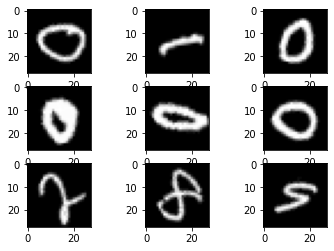

In [143]:
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  # create a 3x3 grid images
  for i in range(0,9):
    pyplot.subplot(330 + 1 +i)
    pyplot.imshow(X_batch[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
  # show the digit images
  pyplot.show()
  break

## **Perform Grayscale Normalization of the data prior training **

F. The code should normalize the input as discussed in the class before training (scaling the input)

In [145]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [200]:
# Split the train and the validation set for the fitting
model = Model()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=(2))

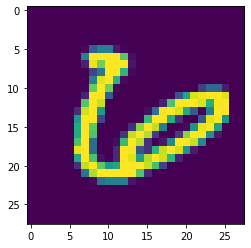

In [147]:
plt.imshow(X_train[129][:,:,0])

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(epoch):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=20)

plot_3d(x, y_true, y_pred)

## **Neural Nets MNIST Model with Minibatch Gradient Descent**




In [85]:
import numpy, sys
np.random.seed(1)

#Activation Function
def Relu(x):
    # returns x if x > 0
    return ( x >= 0 ) * x

def Relu_derivative(output):
    # returns 1 for input > 0
    return output >= 0 

# Initialize Batch size
minibatch = 64

# Initialize and change parameters learning rate ( 0.005 ~ 0.001)
lr, epoch, hidden_size, = (0.005, 300, 100)
pixels, numLabels = (784, 10)

weights0_1 = 0.2*np.random.random((pixels, hidden_size)) - 0.1
weights1_2 = 0.2*np.random.random((hidden_size, numLabels)) - 0.1

for j in range(epoch):
    error, correctCnt = (0.0, 0)

    # Feed forward through layers 0, 1, and 2 ( 3 layers) with minibatch
    for i in range(int(len(digits) / minibatch)):
        minibatch_start, minibatch_end = ((i * minibatch), ((i+1)*minibatch))

        layer_0 = digits[minibatch_start:minibatch_end]
        layer_1 = Relu(np.dot(layer_0,weights0_1))

        # Adding Dropout
        dropOut_mask = np.random.randint(2, size=layer_1.shape)

        layer_1 *= dropOut_mask * 2
        layer_2 = np.dot(layer_1, weights1_2)  

    # How much did we miss the target value(error)? with minibatch
        error += np.sum((labels[minibatch_start:minibatch_end] - layer_2) ** 2)
        for k in range(minibatch):
            correctCnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[minibatch_start+k:minibatch_start+k+1]))
            # correctCnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))

    # Compute the gradient descent using relu activation function with minibatch
        layer_2_deltaChange = (labels[minibatch_start:minibatch_end] - layer_2) / minibatch
        layer_1_deltaChange = layer_2_deltaChange.dot(weights1_2.T) * Relu_derivative(layer_1)

    # Adding DropOut
        layer_1_deltaChange *+ dropOut_mask

    # Updating the weights 
        weights1_2 += lr * layer_1.T.dot(layer_2_deltaChange)
        weights0_1 += lr * layer_0.T.dot(layer_1_deltaChange)

    # Test Digits Sample
    if(j % 10 == 0 or j == epoch-1):
        testError, testCorrectcnt = (0.0, 0)

    for i in range(len(test_digits)):
        # Feed forward through layers 0, 1, and 2 ( 3 layers) for test MNIST digit samples
        layer_0 = test_digits[i:i+1]
        layer_1 = Relu(np.dot(layer_0,weights0_1))
        layer_2 = np.dot(layer_1,weights1_2)

        # how much did we miss the target value(error)?
        testError += np.sum((test_labels[i:i+1] - layer_2) ** 2)
        testCorrectcnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
      

    print("\r Epoch:" + str(j) + " Training-Error:" + str(error/float(len(digits)))[0:5] + "-> Training-Accuracy:" + str(correctCnt/float(len(digits))) + \
          ", Test-Error:" + str(testError/float(len(test_digits)))[0:5] + " -> Test-Accuracy:" + str(testCorrectcnt/float(len(test_digits))))
    # print("\r Epoch:" + str(j) + " Training-Error:" + str(error/float(len(digits)))[0:5] + ", Training-Accuracy:" + str(correctCnt/float(len(digits))))

 Epoch:0 Training-Error:1.722-> Training-Accuracy:0.081, Test-Error:1.134 -> Test-Accuracy:0.1119
 Epoch:1 Training-Error:1.439-> Training-Accuracy:0.104, Test-Error:2.166 -> Test-Accuracy:0.2711
 Epoch:2 Training-Error:1.332-> Training-Accuracy:0.152, Test-Error:3.148 -> Test-Accuracy:0.4721
 Epoch:3 Training-Error:1.277-> Training-Accuracy:0.146, Test-Error:4.091 -> Test-Accuracy:0.7134
 Epoch:4 Training-Error:1.189-> Training-Accuracy:0.183, Test-Error:5.003 -> Test-Accuracy:0.9908
 Epoch:5 Training-Error:1.139-> Training-Accuracy:0.206, Test-Error:5.888 -> Test-Accuracy:1.3057
 Epoch:6 Training-Error:1.116-> Training-Accuracy:0.21, Test-Error:6.748 -> Test-Accuracy:1.657
 Epoch:7 Training-Error:1.088-> Training-Accuracy:0.241, Test-Error:7.585 -> Test-Accuracy:2.0361
 Epoch:8 Training-Error:1.054-> Training-Accuracy:0.254, Test-Error:8.405 -> Test-Accuracy:2.4366
 Epoch:9 Training-Error:1.020-> Training-Accuracy:0.295, Test-Error:9.208 -> Test-Accuracy:2.8661
 Epoch:10 Training-Err

# **Plot the results and confusion matrix**

In [27]:
import numpy, sys
np.random.seed(1)

class Model:

  #Activation Function
  def Relu(x):
      # returns x if x > 0
      return ( x >= 0 ) * x

  def Relu_derivative(output):
      # returns 1 for input > 0
      return output >= 0 

  # Initialize Batch size
  minibatch = 64
  # Initialize and change parameters learning rate ( 0.005 ~ 0.001)
  lr, epoch, hidden_size, = (0.005, 300, 100)
  pixels, numLabels = (784, 10)

  weights0_1 = 0.2*np.random.random((pixels, hidden_size)) - 0.1
  weights1_2 = 0.2*np.random.random((hidden_size, numLabels)) - 0.1
  
  for j in range(epoch):
      error, correctCnt = (0.0, 0)

      # Feed forward through layers 0, 1, and 2 ( 3 layers) with minibatch
      for i in range(int(len(digits) / minibatch)):
          minibatch_start, minibatch_end = ((i * minibatch), ((i+1)*minibatch))

          layer_0 = digits[minibatch_start:minibatch_end]
          layer_1 = Relu(np.dot(layer_0,weights0_1))

          # Adding Dropout
          dropOut_mask = np.random.randint(2, size=layer_1.shape)

          layer_1 *= dropOut_mask * 2
          layer_2 = np.dot(layer_1, weights1_2)  

      # How much did we miss the target value(error)? with minibatch
          error += np.sum((labels[minibatch_start:minibatch_end] - layer_2) ** 2)
          for k in range(minibatch):
              correctCnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[minibatch_start+k:minibatch_start+k+1]))
              # correctCnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))

      # Compute the gradient descent using relu activation function with minibatch
          layer_2_deltaChange = (labels[minibatch_start:minibatch_end] - layer_2) / minibatch
          layer_1_deltaChange = layer_2_deltaChange.dot(weights1_2.T) * Relu_derivative(layer_1)

      # Adding DropOut
          layer_1_deltaChange *+ dropOut_mask

      # Updating the weights 
          weights1_2 += lr * layer_1.T.dot(layer_2_deltaChange)
          weights0_1 += lr * layer_0.T.dot(layer_1_deltaChange)

      # Test Digits Sample
      if(j % 10 == 0 or j == epoch-1):
          testError, testCorrectcnt = (0.0, 0)

      for i in range(len(test_digits)):
          # Feed forward through layers 0, 1, and 2 ( 3 layers) for test MNIST digit samples
          layer_0 = test_digits[i:i+1]
          layer_1 = Relu(np.dot(layer_0,weights0_1))
          layer_2 = np.dot(layer_1,weights1_2)

          # how much did we miss the target value(error)?
          testError += np.sum((test_labels[i:i+1] - layer_2) ** 2)
          testCorrectcnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
        

      print("\r Epoch:" + str(j) + " Training-Error:" + str(error/float(len(digits)))[0:5] + "-> Training-Accuracy:" + str(correctCnt/float(len(digits))) + \
            ", Test-Error:" + str(testError/float(len(test_digits)))[0:5] + " -> Test-Accuracy:" + str(testCorrectcnt/float(len(test_digits))))
      # print("\r Epoch:" + str(j) + " Training-Error:" + str(error/float(len(digits)))[0:5] + ", Training-Accuracy:" + str(correctCnt/float(len(digits))))

 Epoch:0 Training-Error:1.722-> Training-Accuracy:0.081, Test-Error:1.134 -> Test-Accuracy:0.1119
 Epoch:1 Training-Error:1.439-> Training-Accuracy:0.104, Test-Error:2.166 -> Test-Accuracy:0.2711
 Epoch:2 Training-Error:1.332-> Training-Accuracy:0.152, Test-Error:3.148 -> Test-Accuracy:0.4721
 Epoch:3 Training-Error:1.277-> Training-Accuracy:0.146, Test-Error:4.091 -> Test-Accuracy:0.7134
 Epoch:4 Training-Error:1.189-> Training-Accuracy:0.183, Test-Error:5.003 -> Test-Accuracy:0.9908
 Epoch:5 Training-Error:1.139-> Training-Accuracy:0.206, Test-Error:5.888 -> Test-Accuracy:1.3057
 Epoch:6 Training-Error:1.116-> Training-Accuracy:0.21, Test-Error:6.748 -> Test-Accuracy:1.657
 Epoch:7 Training-Error:1.088-> Training-Accuracy:0.241, Test-Error:7.585 -> Test-Accuracy:2.0361
 Epoch:8 Training-Error:1.054-> Training-Accuracy:0.254, Test-Error:8.405 -> Test-Accuracy:2.4366
 Epoch:9 Training-Error:1.020-> Training-Accuracy:0.295, Test-Error:9.208 -> Test-Accuracy:2.8661
 Epoch:10 Training-Err

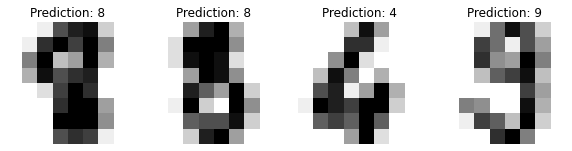

In [72]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [73]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


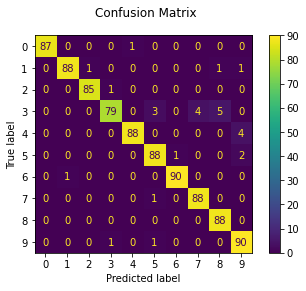

In [74]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# **Part 2. MNIST Keras Classifier**

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

# convert to one-hot-encoding
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

In [391]:
# Load the data
train = pd.read_csv("/content/drive/MyDrive/cmpe-258-Deep Learning/mnist/train.csv")
test = pd.read_csv("/content/drive/MyDrive/cmpe-258-Deep Learning/mnist/test.csv")

In [392]:
Y_train = train['label']

# Drop the "label" column
X_train = train.drop(labels = ['label'],axis = 1)

# Free memory space
del train 

In [393]:
# Normalize the dataset
X_train = X_train / 255.0
test = test / 255.0

#Reshape image size into 3Dimension (h=28px, w=28px, canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

# Hot encoding the labels (ex: 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes=10)

# Set the random seed
random_seed = 2

In [394]:
# Split the train and the validation set for the fitting of model
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [406]:
# Set the Keras CNN model -> [[Conv2D->relu] * 2 -> MaxPool2D -> Dropout] * 2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [407]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [408]:
# Compile the mode
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [409]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [410]:
# Turn epochs to 30 to get 0.9967 accuracy
epochs = 1 
batch_size = 86

In [411]:
# Without data augmentation i obtained an accuracy of 0.98114
NN = model.fit(X_train, Y_train, batch_size = batch_size, epochs=epochs, validation_data = (X_val, Y_val), verbose = 2)

440/440 - 256s - loss: 0.2352 - accuracy: 0.9246 - val_loss: 0.0932 - val_accuracy: 0.9719


In [417]:
# This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.
def plot_confusion_matrix(cm, classes, normalize=False, title='MNIST Confusion Matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center',color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True MNIST Label')
    plt.xlabel('MNIST Predicted Label')

In [418]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors encoded
Y_pred_classes = np.argmax(Y_pred, axis = 1)

# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)

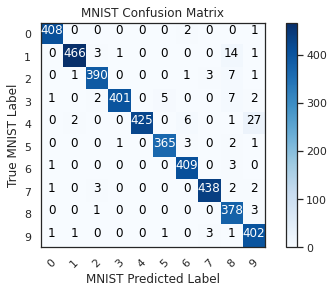

In [419]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# plot the confusion matrix, applying normalization the value in confusion matrix is converted to float.
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [423]:
# With data augmentation to prevent overfitting (accuracy 0.99286)
datagen = ImageDataGenerator( featurewise_center = False, # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False, # divide inputs by std of the dataset
        samplewise_std_normalization = False, # divide input by its std
        zca_whitening = False, # apply ZCA whitening
        rotation_range = 10, # randomly rotate images in the range (degress, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range = 0.1, # randomly shift images horizontally (fraction of total width) 
        height_shift_range = 0.1, # randomly shift images vertically (fraction of total height
        horizontal_flip = False, # randomly flip images
        vertical_flip = False) # randomly flip images

datagen.fit(X_train)

In [424]:
# Fit the model
nn = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size), epochs=epochs, validation_data = (X_val,Y_val),
                        verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size, callbacks=[learning_rate_reduction])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


439/439 - 255s - loss: 0.1737 - accuracy: 0.9475 - val_loss: 0.0776 - val_accuracy: 0.9802


In [425]:
# This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.
def plot_confusion_matrix(cm, classes, normalize=False, title='MNIST Confusion Matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center',color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True MNIST Label')
    plt.xlabel('MNIST Predicted Label')

In [426]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors encoded
Y_pred_classes = np.argmax(Y_pred, axis = 1)

# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)

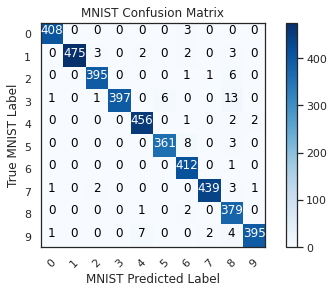

In [427]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# plot the confusion matrix, applying normalization the value in confusion matrix is converted to float.
plot_confusion_matrix(confusion_mtx, classes = range(10))

# **References link**



A. Check Grokking deep learning book 
Sample code :  https://github.com/iamtrask/Grokking-Deep-Learning (Links to an external site.) chapter 7,8,9.  - use mini batch, dropout, learning rate etc.,. 

Pick appropriate batch size for minibatch (read fastai and other tips and https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6 (Links to an external site.) for example.) see sample https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/ (Links to an external site.) as well.

B. Try various dropout rates and pick the one which works well. (need not be same for all layers ;-) ). - see https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6 (Links to an external site.) for ideas.

The code should initialize the random weights of network properly - see https://docs.google.com/presentation/d/1cYzq7TEGXRAhKF9P0eOI_q01kQAOajl-eS9h3CTGRLg/edit#slide=id.g60fb2717a6_37_196 (Links to an external site.) for more information on how to initialize the random weights before training

C. The code should do basic image augmentations to supplement the training data (not testing data) using keras libraries  (NEW than the deck) 
See the image augmentations tried in https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6 (Links to an external site.)

G.The code should use appropriate learning rate (try out few to find out which one works)
You can use adaptive learning rates like different learning rates per epoch or per mini batch - see discussion of learning rate schedules https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6 (Links to an external site.)

https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/ (Links to an external site.) for more information on different learning rates generations for various epochs etc.

I. The code should display top common errors like in below link.
Extra points if you hit 99% test accuracy with these changes (very challenging given you are not using CNNs).

Sample (these are with using keras you should try not to use keras for training model /testing other than data preprocessing - like image data augmentation, scaling, normalization ) :

https://stats.stackexchange.com/questions/376312/mnist-digit-recognition-what-is-the-best-we-can-get-with-a-fully-connected-nn-o (Links to an external site.)

https://www.kaggle.com/fchollet/simple-deep-mlp-with-keras/code (Links to an external site.) (Links to an external site.)

https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6.  (Links to an external site.)

https://www.kaggle.com/c/digit-recognizer/discussion/61480 (Links to an external site.)

https://www.kaggle.com/adityaecdrid/mnist-with-keras-for-beginners-99457 (Links to an external site.)

more inspiration : https://www.kaggle.com/c/digit-recognizer/notebooks (Links to an external site.). 

(note that most use cnn which we have not yet studied - you should use regular neural network)

Hint: you can hack  on getting these tunings and  hyperparameters by running experiments on gpu using free  automl online services (like https://www.simonwenkel.com/2018/08/30/autokeras_mnist.html 
(Links to an external site.), 

or a ton of tools similar to this (like online free https://www.r-bloggers.com/kannada-mnist-prediction-classification-using-h2o-automl-in-r/ (Links to an external site.).

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html (Links to an external site.).

https://www.h2o.ai/blog/a-deep-dive-into-h2os-automl/?gclid=Cj0KCQiA4sjyBRC5ARIsAEHsELEeWwIWhvZeJj75IRd_PWUBFSEZS7zllR0Abk0Pp9ao7euEmvXzA5IaAnZBEALw_wcB (Links to an external site.). )  

- aka - test the right dnn configuration (without cnn) - first or capture from your research online - and then try it out in your python code)
